In [1]:
# Third-party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Project imports
import twinlab as tl


         === TwinLab Client Initialisation ===
         Version  : 1.3.0
         User     : michelle
         Server   : https://mt9w8ln59j.execute-api.eu-west-2.amazonaws.com/dev
         Key      : F_1GHOdY2rxCrPNC2U2LgQ



In [2]:
# Parameters
dataset_id = "data-scaling"
campaign_id = dataset_id
err_sig = 0.25
n_train = 100
n_eval = 101
random_seed = 42
n_cycle = 2

def f(x):
    return np.sin(2*np.pi*x*n_cycle)

In [3]:
# Seed the random-number generator
np.random.seed(random_seed)

# Training Data
X = np.random.rand(n_train)
y = f(X)+np.random.normal(0., err_sig, n_train)
df_train = pd.DataFrame({'X': X, 'y': y})
display(df_train)
tl.upload_dataset(df_train, dataset_id, verbose=True)

,X,y
0,0.374540,-0.978222
1,0.950714,-0.655252
2,0.731994,0.247285
3,0.598658,0.448820
4,0.156019,0.870070
...,...,...
95,0.493796,-0.281840
96,0.522733,0.262524
97,0.427541,-0.704551
98,0.025419,0.383195


Dataframe is uploading.
Processing dataset.
Dataset data-scaling was processed.


In [4]:
# Evaluation data
eval = {"X": np.linspace(0, 1, n_eval)}
df_test = pd.DataFrame(eval)
display(df_test)

,X
0,0.00
1,0.01
2,0.02
3,0.03
4,0.04
...,...
96,0.96
97,0.97
98,0.98
99,0.99


Number of data points used for training: 10
Model data-scaling has begun training.
Number of data points used for training: 20
Model data-scaling has begun training.
Number of data points used for training: 40
Model data-scaling has begun training.
Number of data points used for training: 80
Model data-scaling has begun training.


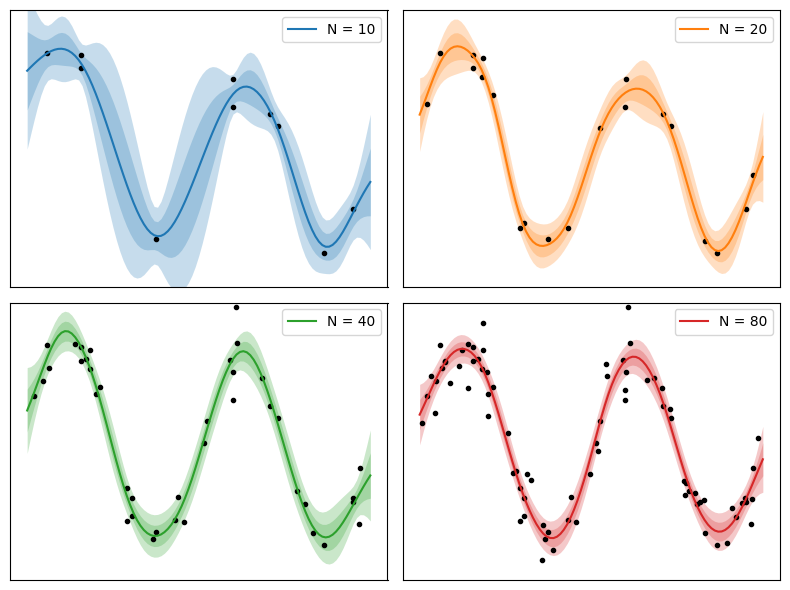

In [5]:
# Training parameters
params = {
    "dataset_id": dataset_id,
    "inputs" : ["X"],
    "outputs": ["y"],
    "test_train_ratio": 1.,
}

# Plot parameters
grid = df_test["X"].values
alpha_fill = 0.25
ratios = [0.1, 0.2, 0.4, 0.8]
nrow, ncol = 2, 2
figx, figy = 4, 3

# Loop over different error in data and plot
plt.subplots(nrow, ncol, figsize=(ncol*figx, nrow*figy))
for iplot, ratio in enumerate(ratios):

    # Train model
    n = int(ratio*len(df_train))
    print("Number of data points used for training:", n)
    params["test_train_ratio"] = ratio
    tl.train_campaign(params, campaign_id, verbose=True)

    # Predict
    df_mean, df_std = tl.predict_campaign(df_test, campaign_id)
    mean, err = df_mean["y"].values, df_std["y"].values

    # Plot
    color = f"C{iplot}"
    plt.subplot(nrow, ncol, iplot+1)
    plt.plot(df_train["X"][:n], df_train["y"][:n], ".", color="black")
    plt.plot(grid, mean, "-", color=color, label=f"N = {n}")
    for nsig in [1, 2]:
        plt.fill_between(grid, mean-nsig*err, mean+nsig*err, lw=0, color=color, alpha=alpha_fill)
    # plt.xlabel("X"); plt.ylabel("y")
    plt.xticks([]); plt.yticks([])
    plt.ylim((-1.5, 1.5))
    plt.legend()

# Finalize plot
plt.tight_layout()
plt.show()

In [6]:
# Delete campaign and dataset if necessary
tl.delete_campaign(campaign_id, verbose=True)
tl.delete_dataset(dataset_id, verbose=True)

Model data-scaling deleted from the Cloud.
Dataset data-scaling deleted from the Cloud.
